In [1]:
%matplotlib inline


# Confusion matrix


Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using `grid_search`.




In [6]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels


Automatically created module for IPython interactive environment


In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels th at appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    print(cm)
    title = title + ('\nAccuracy :{0:0.3f}'.format(accuracy_score(y_true, y_pred)))
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title= title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [4]:
################

In [7]:
DataTest2 = pd.read_csv(
    'data/training-testing/DataTest-sec-check-class.csv', 
    low_memory=False)


In [8]:
DataTest2.columns

Index(['Unnamed: 0', 'reviewId', 'itemId', 'userId', 'sentiment_score_class',
       'hum_sentiment_score_class'],
      dtype='object')

In [9]:
y_test2 = np.array(DataTest2.hum_sentiment_score_class).astype(int)
y_predict2 = np.array(DataTest2.sentiment_score_class).astype(int)

In [10]:
print(set(y_test2))
print(set(y_predict2))

{1, 2, 3}
{1, 2, 3}


In [12]:
class_names_try = [1,2,3]

[[ 14   0   0]
 [  2 180   0]
 [  0   1  27]]


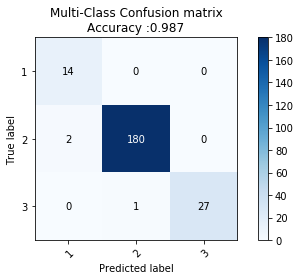

In [13]:
# Plot non-normalized confusion matrix TRY
plot_confusion_matrix(y_test2, y_predict2, classes=class_names_try, title='Multi-Class Confusion matrix')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       0.99      0.99      0.99       182
           3       1.00      0.96      0.98        28

   micro avg       0.99      0.99      0.99       224
   macro avg       0.96      0.98      0.97       224
weighted avg       0.99      0.99      0.99       224

